# All the imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Download NLTK resources

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tahsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Load Data

In [6]:
sold_df = pd.read_csv('../data/sold_properties.csv')
for_sale_df = pd.read_csv('../data/for_sale_properties.csv')

# Basic Data exploration

In [7]:
print("Sold properties shape:", sold_df.shape)
print("For sale properties shape:", for_sale_df.shape)
print("\nSold properties columns:", sold_df.columns.tolist())
print("\nFor sale properties columns:", for_sale_df.columns.tolist())

Sold properties shape: (816, 64)
For sale properties shape: (211, 64)

Sold properties columns: ['property_url', 'property_id', 'listing_id', 'permalink', 'mls', 'mls_id', 'status', 'mls_status', 'text', 'style', 'formatted_address', 'full_street_line', 'street', 'unit', 'city', 'state', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'list_price', 'list_price_min', 'list_price_max', 'list_date', 'pending_date', 'sold_price', 'last_sold_date', 'last_sold_price', 'assessed_value', 'estimated_value', 'tax', 'tax_history', 'new_construction', 'lot_sqft', 'price_per_sqft', 'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code', 'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name', 'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id', 'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id', 'office_mls_set', 'office_name', 'office_email', 'office_phones', 'nearby_schools', 'primary_photo', 'alt_photos']

For 

# Missing Values

In [9]:
print("\nMissing values in sold properties:")
print(sold_df.isnull().sum().sort_values(ascending=False).head(10))
print("\nMissing values in for sale properties:")
print(for_sale_df.isnull().sum().sort_values(ascending=False).head(10))


Missing values in sold properties:
list_price_min    816
list_price_max    816
builder_id        816
builder_name      816
unit              810
agent_nrds_id     549
broker_id         518
half_baths        476
broker_name       452
office_id         369
dtype: int64

Missing values in for sale properties:
unit              211
list_price_max    211
list_price_min    211
builder_name      211
builder_id        211
pending_date      144
half_baths        129
agent_nrds_id     118
broker_id         112
nearby_schools    100
dtype: int64


# Calculate price per square foot and Analyze by neighborhood

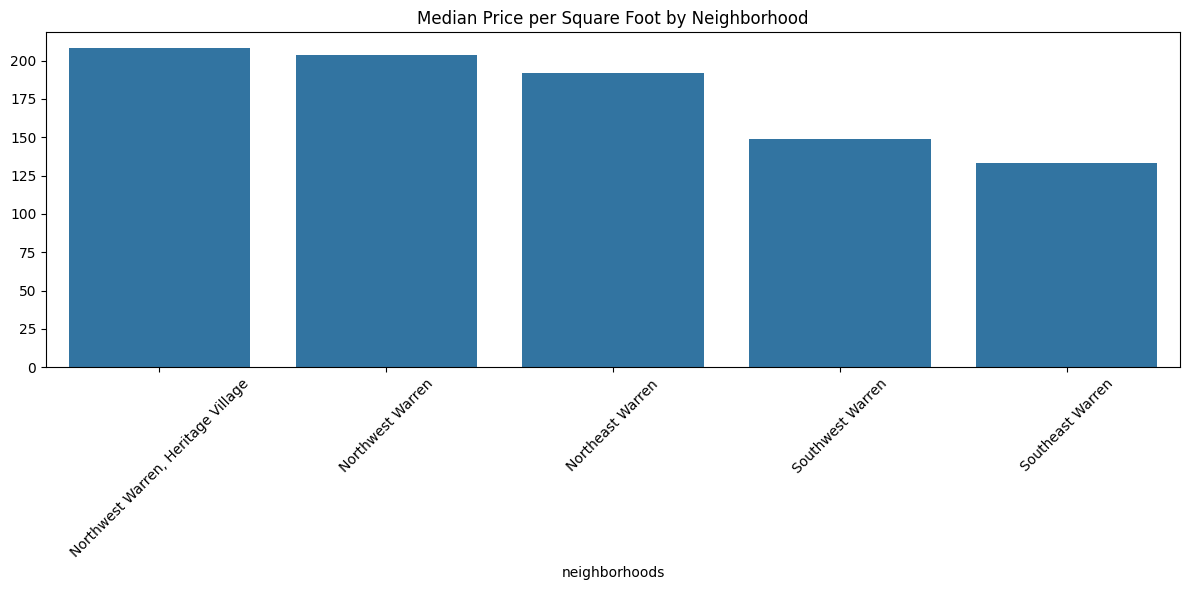

In [11]:
sold_df['price_per_sqft'] = sold_df['sold_price'] / sold_df['sqft']
for_sale_df['price_per_sqft'] = for_sale_df['list_price'] / for_sale_df['sqft']
plt.figure(figsize=(12, 6))
neighborhood_prices = sold_df.groupby('neighborhoods')['price_per_sqft'].median().sort_values(ascending=False)
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values)
plt.title('Median Price per Square Foot by Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze relationship between year built and price

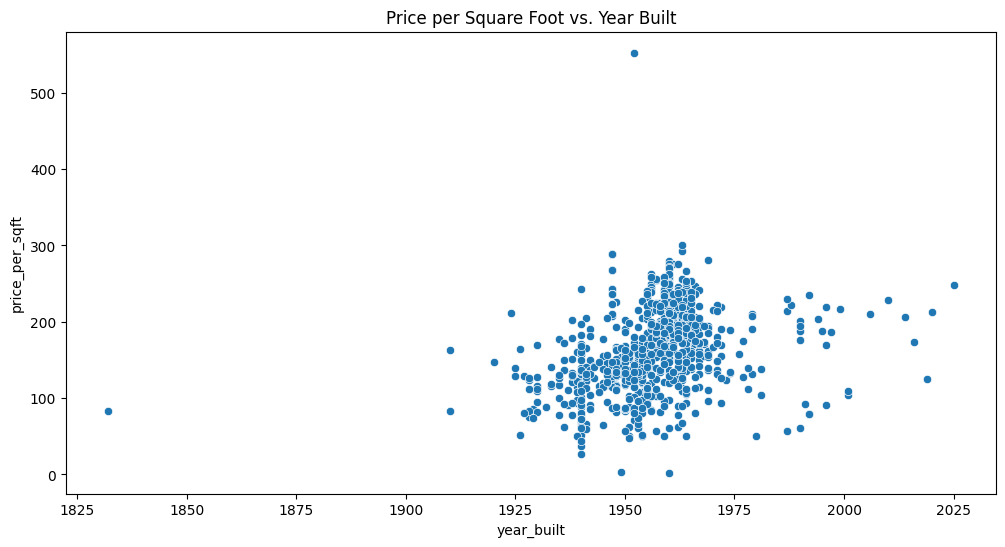

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year_built', y='price_per_sqft', data=sold_df)
plt.title('Price per Square Foot vs. Year Built')
plt.show()

# Analyze days on market vs. sold price

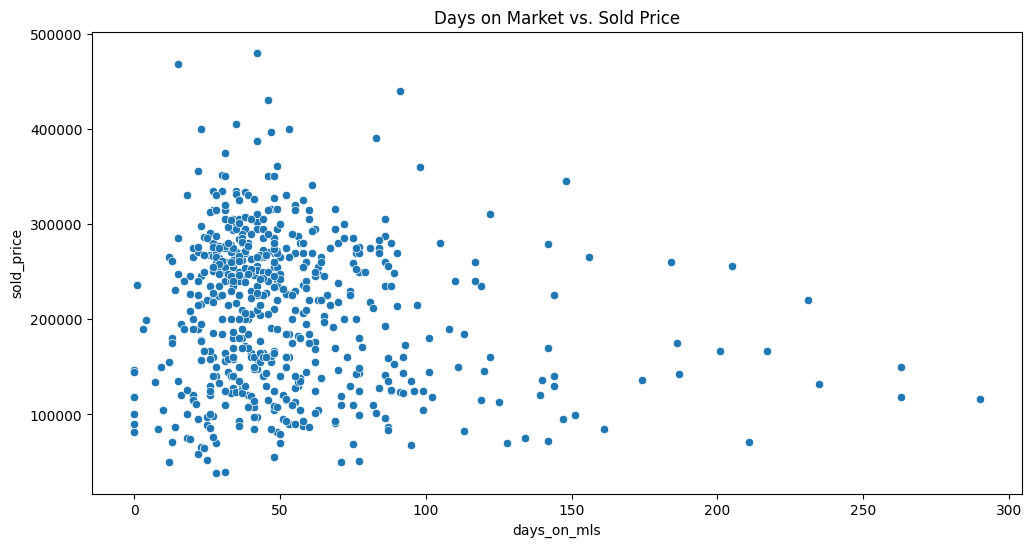

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_on_mls', y='sold_price', data=sold_df)
plt.title('Days on Market vs. Sold Price')
plt.show()

# Text analysis - word cloud for property descriptions

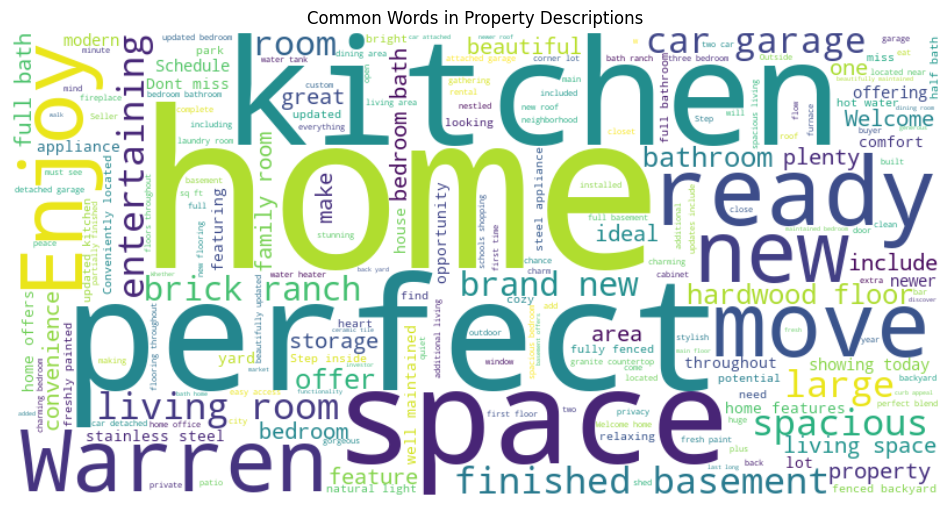

In [14]:
text = ' '.join(sold_df['text'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Property Descriptions')
plt.show()